<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Completedata001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully!
Available columns: ['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD']
Pearson correlation coefficient: r = -0.039
P-value: 1.064e-01


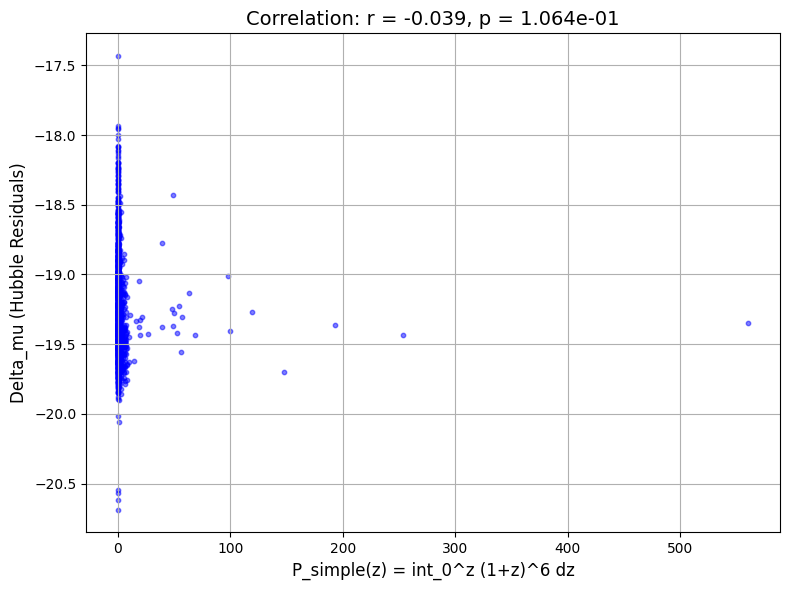

In [ ]:
# Install required packages
!pip install astropy

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import urllib.request
import ssl

# Disable SSL verification for GitHub raw URLs
ssl._create_default_https_context = ssl._create_unverified_context

# Step 1: Load Pantheon+ data
url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
try:
    data = pd.read_csv(url, sep=r'\s+')
    print("Data loaded successfully!")
    print("Available columns:", list(data.columns))
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Step 2: Extract relevant columns
try:
    z = data['zCMB'].values  # Redshift
    mB = data['mB'].values   # Corrected apparent magnitude
    mB_err = data['mBERR'].values  # Uncertainty
except KeyError as e:
    print(f"KeyError: Column {e} not found. Available columns:", list(data.columns))
    print("Please check column names (e.g., 'mBERR', 'mb_err', 'MERR', or similar).")
    raise

# Step 3: Compute P_simple(z) = ∫(1+z')^6 dz' = [(1+z)^7 - 1]/7
p_simple = ((1 + z)**7 - 1) / 7

# Step 4: Compute Δμ (Hubble residuals)
# Define a ΛCDM model (H0=73.4, Ω_m=0.31 to match Pantheon+ best-fit)
cosmo = FlatLambdaCDM(H0=73.4, Om0=0.31)
try:
    mu_model = np.array([cosmo.distmod(z_i).value for z_i in z])  # Predicted distance modulus
    delta_mu = mB - mu_model  # Hubble residuals
except Exception as e:
    print(f"Error computing distance modulus: {e}")
    raise

# Step 5: Compute Pearson correlation
r, p_value = pearsonr(delta_mu, p_simple)
print(f"Pearson correlation coefficient: r = {r:.3f}")
print(f"P-value: {p_value:.3e}")

# Step 6: Plot the relationship
plt.figure(figsize=(8, 6))
plt.scatter(p_simple, delta_mu, s=10, alpha=0.5, color='blue')
plt.xlabel('P_simple(z) = int_0^z (1+z)^6 dz', fontsize=12)
plt.ylabel('Delta_mu (Hubble Residuals)', fontsize=12)
plt.title(f'Correlation: r = {r:.3f}, p = {p_value:.3e}', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()